In [1]:
import pandas as pd

# Loading the dataset into Pandas DataFrame
df = pd.read_csv('tire_dataset.csv')
df.columns = df.columns.str.strip()

# Data Preprocessing

In [2]:
# Preview of data before changes

print("Preview of data before preprocessing:")
df.head()

Preview of data before preprocessing:


,Brand,Model,Submodel,Tyre Brand,Serial No.,Type,Load Index,Size,Selling Price,Original Price,Rating
0,Maruti,Swift Dzire,LDI (Diesel),JKTyre,Taximaxx,Tubeless,85,165/80 R 14,"3,255","3,255",5.0
1,Maruti,Swift Dzire,LDI (Diesel),CEAT,Milage X3,Tubeless,85,165/80 R 14,"3,406","3,406",4.0
2,Maruti,Swift Dzire,LDI (Diesel),Apollo,Amazer 4G Life,Tubeless,85,165/80 R 14,"3,490","4,319",4.5
3,Maruti,Swift Dzire,LDI (Diesel),Continental,Comfort Contact CC6,Tubeless,85,165/80 R 14,"4,484","4,244",NaN
4,Maruti,Swift Dzire,LDI (Diesel),GoodYear,Assurance Duraplus 2,Tubeless,85,165/80 R 14,"3,025","3,025",4.2


In [3]:
# Checking for missing values

missing_values = df.isnull().sum()
print("\nMissing Values Before Handling:")
print(missing_values)


Missing Values Before Handling:
Brand                0
Model                0
Submodel             0
Tyre Brand           0
Serial No.           0
Type                 0
Load Index           0
Size                 0
Selling Price        0
Original Price       0
Rating            2102
dtype: int64


In [4]:
df.shape

(4350, 11)

In [5]:
# Calculating average rating per tyre brand. We cannot directly fill missing values with 0's since about 50% of the records have null values.
avg_rating_by_model_brand = df.groupby(['Tyre Brand'])['Rating'].mean()


# Defining a function to fill missing rating values based on tyre brand
def fill_missing_rating(row):
    if pd.isnull(row['Rating']):
        tyre_brand = row['Tyre Brand']
        if tyre_brand in avg_rating_by_model_brand:
            return avg_rating_by_model_brand[tyre_brand]
    return row['Rating']

# Applying the function to fill missing rating values
df['Rating'] = df.apply(fill_missing_rating, axis=1)

# Verifying that there are no more missing values in the 'Rating' column
print("Number of missing values in 'Rating' column after filling:", df['Rating'].isnull().sum())


Number of missing values in 'Rating' column after filling: 141


In [6]:
# Handling missing values in the 'Rating' column that have no records of Tyre Brand to fill with by replacing them with 0
df['Rating'].fillna(0, inplace=True)
df['Rating'].isnull().sum()

0

In [7]:
missing_values_after = df.isnull().sum()
print("\nMissing Values After Handling:")
print(missing_values_after)



Missing Values After Handling:
Brand             0
Model             0
Submodel          0
Tyre Brand        0
Serial No.        0
Type              0
Load Index        0
Size              0
Selling Price     0
Original Price    0
Rating            0
dtype: int64


In [8]:
# Checking for duplicate rows
duplicate_rows = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicate_rows)

# Remove duplicate rows if found
df.drop_duplicates(inplace=True)


Number of duplicate rows: 134


In [9]:
print("Datatypes before processing")
print(df.dtypes)

Datatypes before processing
Brand              object
Model              object
Submodel           object
Tyre Brand         object
Serial No.         object
Type               object
Load Index          int64
Size               object
Selling Price      object
Original Price     object
Rating            float64
dtype: object


In [10]:
df.columns

Index(['Brand', 'Model', 'Submodel', 'Tyre Brand', 'Serial No.', 'Type',
       'Load Index', 'Size', 'Selling Price', 'Original Price', 'Rating'],
      dtype='object')

In [11]:
[x for x in df['Selling Price'] if '.' in x] , [x for x in df['Original Price'] if '.' in x]
# safe to assume that these columns can be converted to INT64

([], [])

## Tyre Size

A "165/80 R 14" tyre size means the following.



*   165: Width of the tire in millimeters.
*   80: Aspect ratio, indicating the sidewall height as a percentage of the tire's width.
*   R: Radial construction type.
*   14: Rim diameter in inches.





We are going to extract these columns which might give have some contribution during modeling

In [12]:
df['Size'].value_counts()

Size
185/65 R 15    1167
165/80 R 14     633
145/80 R 12     408
155/80 R 13     274
165/70 R 14     234
155/65 R 13     190
205/60 R 16     177
195/55 R 16     162
215/60 R 16     149
145/70 R 13     141
185/70 R 14     127
155/65 R 14     105
175/70 R 13      95
155 R 13         80
195/65 R 15      75
145/80 R 13      63
185/65 R 14      37
225/65 R 17      24
185/70 R14       20
215/55 R 17      14
205/70 R 15       3
205/70 R 16       3
205/70 R 17       3
185/70 R 20       3
185/70 R 19       3
225/70 R 16       3
205/70 R 18       3
145/70 R 19       1
145/70 R 20       1
185/70 R 23       1
185/70 R 15       1
145/70 R 17       1
145/70 R 18       1
145/70 R 12       1
145/70 R 16       1
145/70 R 15       1
145/70 R 14       1
185/70 R 24       1
185/70 R 16       1
185/70 R 21       1
185/70 R 22       1
185/70 R 29       1
185/70 R 28       1
185/70 R 27       1
185/70 R 26       1
185/70 R 25       1
225/70 R 17       1
Name: count, dtype: int64

In [13]:
# Fixing the format of the Tyre Size
df['Size'] = [str(x).replace('R','R ') if 'R ' not in x else x for x in df['Size']]

In [14]:
df['Tyre Width']  = [int(x.split('/')[0]) if '/' in x else 0 for x in df['Size']]
df['Tyre Aspectration']  = [int(x.split('/')[1].split()[0]) if '/' in x else int(x.split('/')[0].split()[0]) for x in df['Size']]
df['Radial constrution type']  = [x.split('/')[1].split()[1] if '/' in x else x.split('/')[0].split()[1] for x in df['Size']]
df['Tyre Rimdiameter']  = [int(x.split('/')[1].split()[2]) if '/' in x else int(x.split('/')[0].split()[2]) for x in df['Size']]
df.head()

,Brand,Model,Submodel,Tyre Brand,Serial No.,Type,Load Index,Size,Selling Price,Original Price,Rating,Tyre Width,Tyre Aspectration,Radial constrution type,Tyre Rimdiameter
0,Maruti,Swift Dzire,LDI (Diesel),JKTyre,Taximaxx,Tubeless,85,165/80 R 14,"3,255","3,255",5.000000,165,80,R,14
1,Maruti,Swift Dzire,LDI (Diesel),CEAT,Milage X3,Tubeless,85,165/80 R 14,"3,406","3,406",4.000000,165,80,R,14
2,Maruti,Swift Dzire,LDI (Diesel),Apollo,Amazer 4G Life,Tubeless,85,165/80 R 14,"3,490","4,319",4.500000,165,80,R,14
3,Maruti,Swift Dzire,LDI (Diesel),Continental,Comfort Contact CC6,Tubeless,85,165/80 R 14,"4,484","4,244",3.993103,165,80,R,14
4,Maruti,Swift Dzire,LDI (Diesel),GoodYear,Assurance Duraplus 2,Tubeless,85,165/80 R 14,"3,025","3,025",4.200000,165,80,R,14


In [15]:
# checking for any $ entry
[x for x in df['Selling Price'] if '$' in x]

[]

In [16]:
df['Selling Price'] = df['Selling Price'].replace('[^\d.]', '', regex=True).astype(float)
df['Original Price'] = df['Original Price'].replace('[^\d.]', '', regex=True).astype(float)

df.head()

,Brand,Model,Submodel,Tyre Brand,Serial No.,Type,Load Index,Size,Selling Price,Original Price,Rating,Tyre Width,Tyre Aspectration,Radial constrution type,Tyre Rimdiameter
0,Maruti,Swift Dzire,LDI (Diesel),JKTyre,Taximaxx,Tubeless,85,165/80 R 14,3255.0,3255.0,5.000000,165,80,R,14
1,Maruti,Swift Dzire,LDI (Diesel),CEAT,Milage X3,Tubeless,85,165/80 R 14,3406.0,3406.0,4.000000,165,80,R,14
2,Maruti,Swift Dzire,LDI (Diesel),Apollo,Amazer 4G Life,Tubeless,85,165/80 R 14,3490.0,4319.0,4.500000,165,80,R,14
3,Maruti,Swift Dzire,LDI (Diesel),Continental,Comfort Contact CC6,Tubeless,85,165/80 R 14,4484.0,4244.0,3.993103,165,80,R,14
4,Maruti,Swift Dzire,LDI (Diesel),GoodYear,Assurance Duraplus 2,Tubeless,85,165/80 R 14,3025.0,3025.0,4.200000,165,80,R,14


In [17]:
# Casting 'Selling Price' and 'Original Price' to integers
df['Selling Price'] = df['Selling Price'].astype(int)
df['Original Price'] = df['Original Price'].astype(int)


In [18]:
print("Datatypes after processing")
print(df.dtypes)

Datatypes after processing
Brand                       object
Model                       object
Submodel                    object
Tyre Brand                  object
Serial No.                  object
Type                        object
Load Index                   int64
Size                        object
Selling Price                int32
Original Price               int32
Rating                     float64
Tyre Width                   int64
Tyre Aspectration            int64
Radial constrution type     object
Tyre Rimdiameter             int64
dtype: object


In [19]:
print("\nPreview of data after preprocessing:")
print(df.head())


Preview of data after preprocessing:
    Brand        Model      Submodel   Tyre Brand            Serial No.  \
0  Maruti  Swift Dzire  LDI (Diesel)       JKTyre              Taximaxx   
1  Maruti  Swift Dzire  LDI (Diesel)         CEAT             Milage X3   
2  Maruti  Swift Dzire  LDI (Diesel)       Apollo        Amazer 4G Life   
3  Maruti  Swift Dzire  LDI (Diesel)  Continental   Comfort Contact CC6   
4  Maruti  Swift Dzire  LDI (Diesel)     GoodYear  Assurance Duraplus 2   

       Type  Load Index         Size  Selling Price  Original Price    Rating  \
0  Tubeless          85  165/80 R 14           3255            3255  5.000000   
1  Tubeless          85  165/80 R 14           3406            3406  4.000000   
2  Tubeless          85  165/80 R 14           3490            4319  4.500000   
3  Tubeless          85  165/80 R 14           4484            4244  3.993103   
4  Tubeless          85  165/80 R 14           3025            3025  4.200000   

   Tyre Width  Tyre Aspe

# Exploratory Data Analysis (EDA)

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
df.columns

Index(['Brand', 'Model', 'Submodel', 'Tyre Brand', 'Serial No.', 'Type',
       'Load Index', 'Size', 'Selling Price', 'Original Price', 'Rating',
       'Tyre Width', 'Tyre Aspectration', 'Radial constrution type',
       'Tyre Rimdiameter'],
      dtype='object')

Summary Statistics for Selling Price:
count     4216.000000
mean      4687.872628
std       1844.317553
min       2248.000000
25%       3387.000000
50%       4272.000000
75%       5594.000000
max      20257.000000
Name: Selling Price, dtype: float64




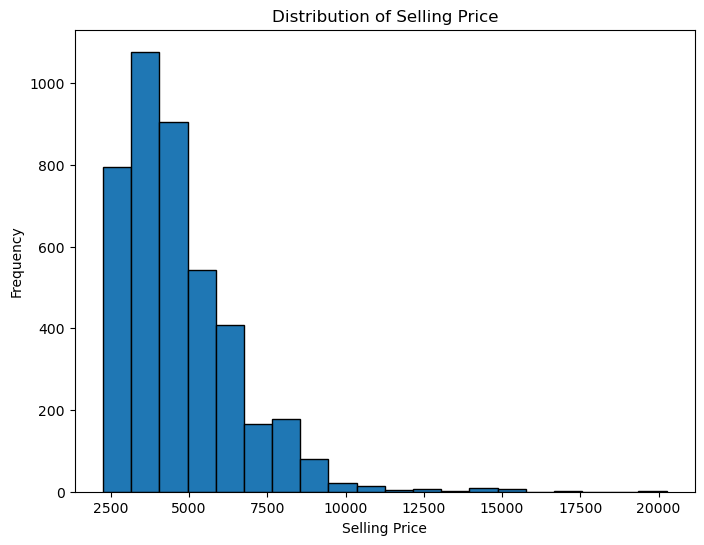

Summary Statistics for Original Price:
count     4216.000000
mean      4724.814991
std       1864.810796
min       2248.000000
25%       3387.000000
50%       4290.000000
75%       5594.000000
max      20257.000000
Name: Original Price, dtype: float64




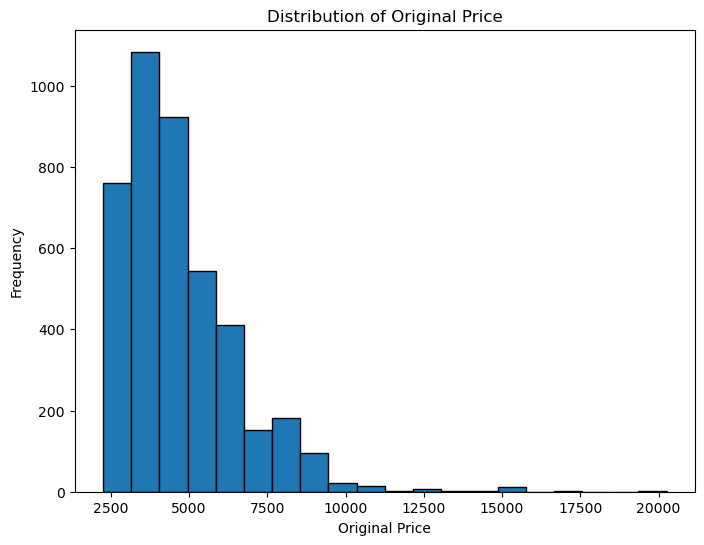

Summary Statistics for Load Index:
count    4216.000000
mean       83.948292
std         6.710038
min        69.000000
25%        79.000000
50%        85.000000
75%        88.000000
max       106.000000
Name: Load Index, dtype: float64




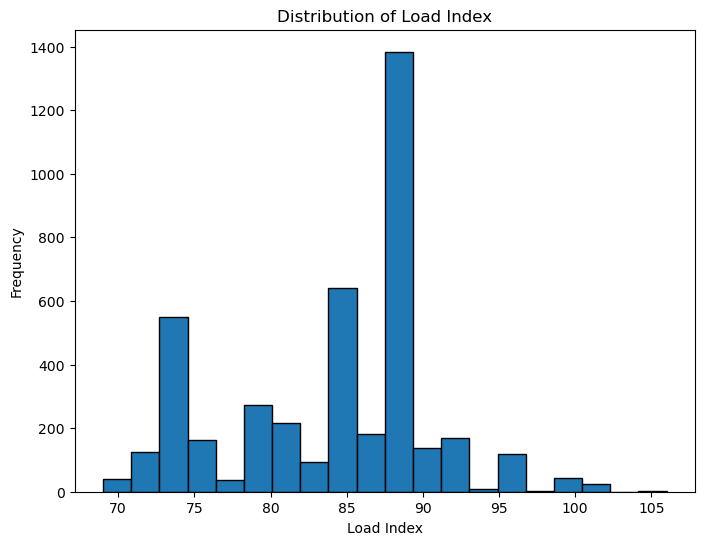

In [22]:
# Numeric Columns Analysis
numeric_cols = ['Selling Price', 'Original Price', 'Load Index']
for var in numeric_cols:
    print(f"Summary Statistics for {var}:")
    print(df[var].describe())
    print('\n')

    # Histogram for distribution
    plt.figure(figsize=(8, 6))
    plt.hist(df[var], bins=20, edgecolor='black')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

Frequency Counts for Brand:
Brand
Maruti    4216
Name: count, dtype: int64




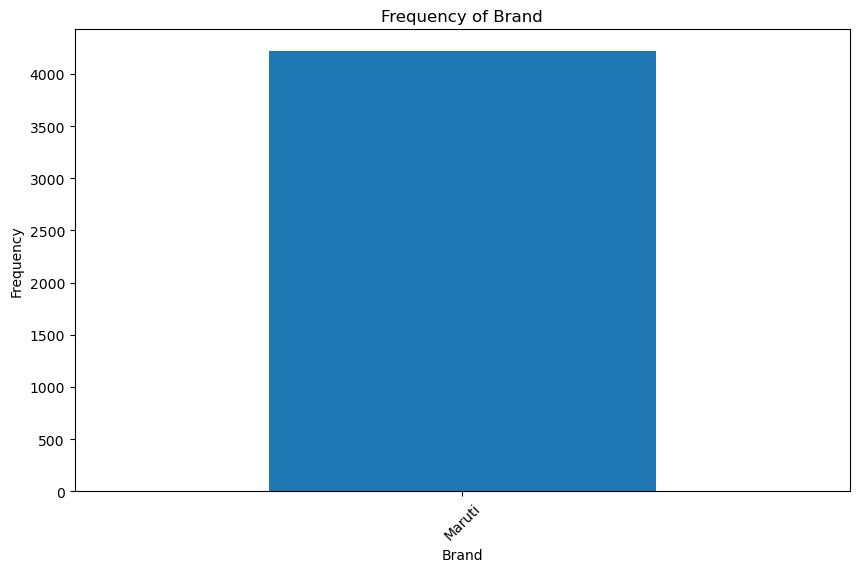

Frequency Counts for Model:
Model
Ciaz                         609
Ertiga                       325
Alto                         299
Swift Dzire                  242
Alto K10                     224
Ritz                         222
Esteem                       215
Vitara Brezza                206
New Swift (2018)             198
SX4                          195
Celerio                      184
Dzire                        168
Swift Dzire 2008             146
Omni                         120
Celerio X                    104
A-Star                       100
Wagon R                       97
Zen Estilo                    96
Eeco                          80
Swift                         75
Stingray                      60
Baleno                        55
Swift Deca                    48
Fronx                         35
Swift                         35
Grand Vitara                  26
Kizashi                       14
Gypsy                         12
800                            9
Zen      

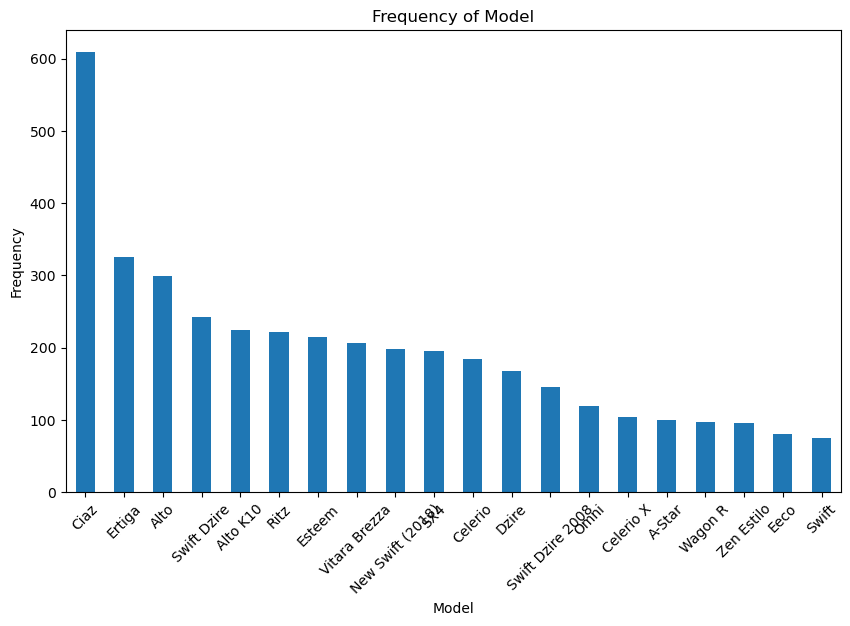

Frequency Counts for Submodel:
Submodel
ZDI (Diesel)              200
LDI (Diesel)              119
Vxi(Petrol)                98
LXI (Petrol)               96
Diesel ZDi +               92
                         ... 
7 At                        1
7 Mt                        1
 VDi                        1
 VDi AMT                    1
Zxi Optional (Petrol)       1
Name: count, Length: 178, dtype: int64




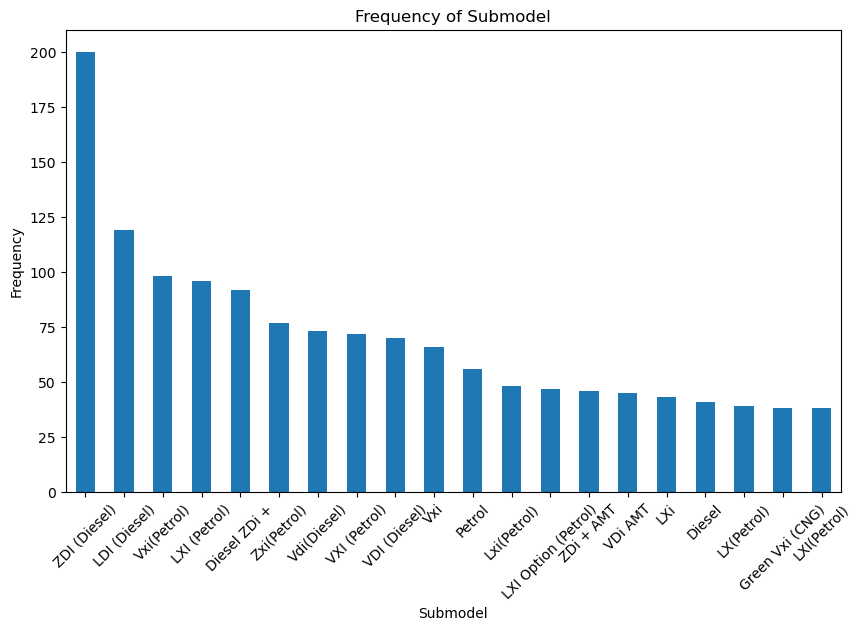

Frequency Counts for Tyre Brand:
Tyre Brand
BridgeStone    593
GoodYear       487
CEAT           435
JKTyre         434
Apollo         386
Yokohama       362
Continental    331
Falken         259
MRF            259
Firestone      167
UltraMile      144
Michelin       125
Pirelli         99
Hankook         64
Kumho           53
Maxxis          18
Name: count, dtype: int64




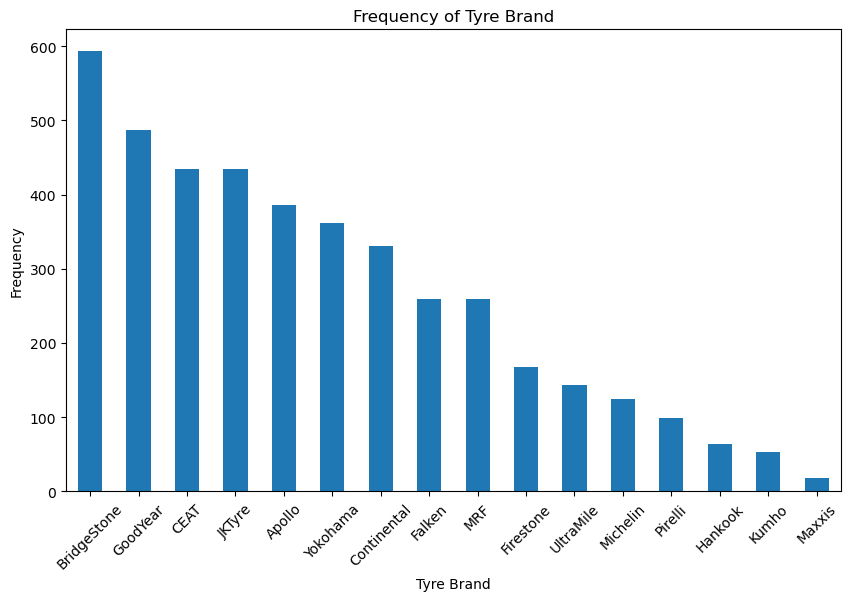

Frequency Counts for Type:
Type
Tubeless    3932
Tube         284
Name: count, dtype: int64




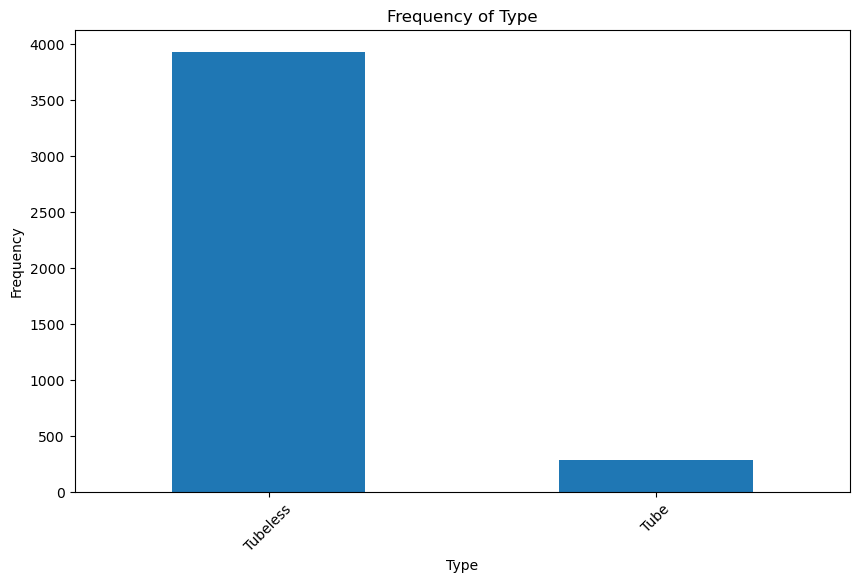

Frequency Counts for Size:
Size
185/65 R 15    1167
165/80 R 14     633
145/80 R 12     408
155/80 R 13     274
165/70 R 14     234
155/65 R 13     190
205/60 R 16     177
195/55 R 16     162
215/60 R 16     149
185/70 R 14     147
145/70 R 13     141
155/65 R 14     105
175/70 R 13      95
155 R 13         80
195/65 R 15      75
145/80 R 13      63
185/65 R 14      37
225/65 R 17      24
215/55 R 17      14
185/70 R 20       3
225/70 R 16       3
205/70 R 15       3
205/70 R 16       3
205/70 R 17       3
185/70 R 19       3
205/70 R 18       3
145/70 R 17       1
185/70 R 15       1
145/70 R 20       1
145/70 R 19       1
145/70 R 18       1
185/70 R 22       1
145/70 R 16       1
145/70 R 15       1
145/70 R 14       1
145/70 R 12       1
185/70 R 16       1
185/70 R 21       1
185/70 R 29       1
185/70 R 28       1
185/70 R 27       1
185/70 R 26       1
185/70 R 25       1
185/70 R 24       1
185/70 R 23       1
225/70 R 17       1
Name: count, dtype: int64




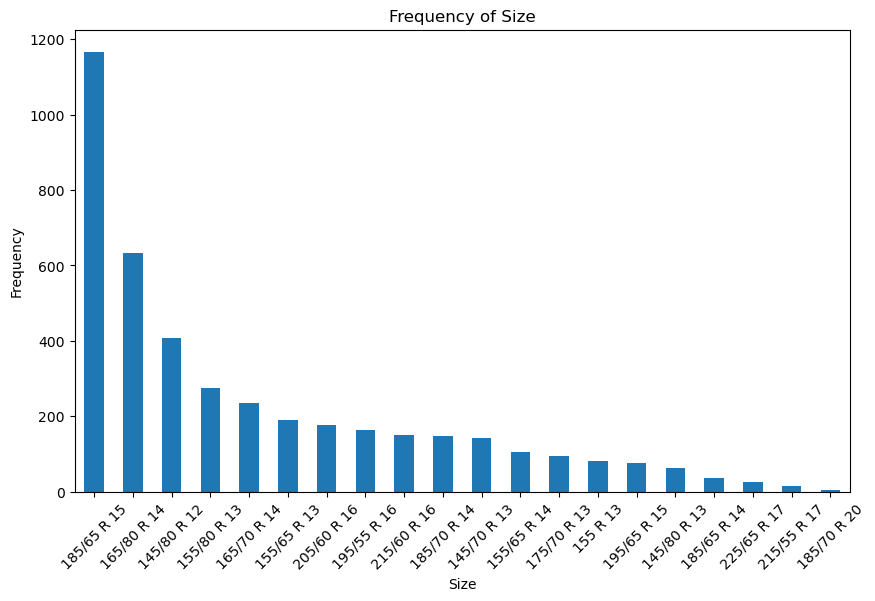

Frequency Counts for Rating:
Rating
5.000000    962
4.000000    525
3.993103    273
4.373778    272
4.492614    258
3.000000    187
4.308511    169
4.238725    166
4.243818    144
0.000000    135
4.325769    135
4.500000    109
4.446939    101
3.939394     79
4.029032     77
4.200000     70
3.700000     59
4.600000     56
3.800000     54
3.600000     53
4.700000     52
4.800000     46
3.900000     40
4.863077     36
2.800000     33
4.067308     26
4.100000     19
4.400000     19
3.500000     15
2.000000     15
4.300000     11
2.900000      9
2.700000      6
1.900000      3
3.300000      2
Name: count, dtype: int64




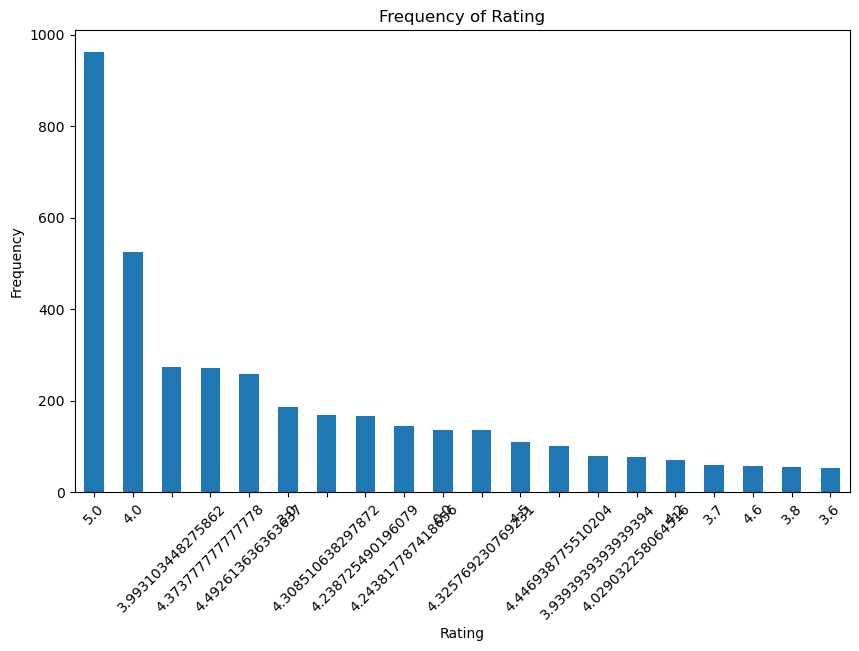

In [23]:
# Categorical Columns Analysis
categorical_cols = ['Brand', 'Model', 'Submodel', 'Tyre Brand', 'Type', 'Size', 'Rating']
for var in categorical_cols:
    print(f"Frequency Counts for {var}:")
    print(df[var].value_counts())
    print('\n')

    # Bar plot for visualization
    plt.figure(figsize=(10, 6))
    df[var].value_counts().head(20).plot(kind='bar')
    plt.title(f'Frequency of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

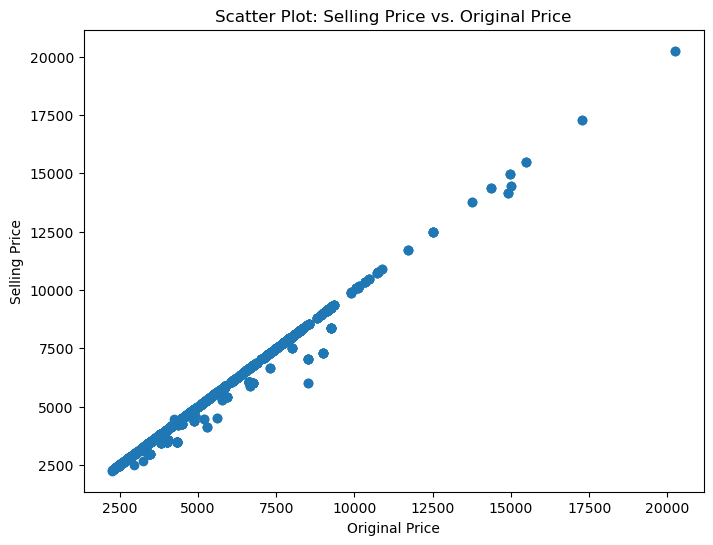

In [39]:
# Bivariate Analysis
# Selling Price vs Original Price

plt.figure(figsize=(8, 6))
plt.scatter(df['Original Price'], df['Selling Price'])
plt.title('Scatter Plot: Selling Price vs. Original Price')
plt.xlabel('Original Price')
plt.ylabel('Selling Price')  

plt.savefig('scatter.png')

plt.show()


The scatter plot displays the relationship between the selling price and original price of tyres. The plot reveals a strong positive correlation between the two variables, indicating that as the original price increases, the selling price also tends to increase. The data points are concentrated along the diagonal, suggesting that most tyres are sold at or near their original price. However, there are some outliers where the selling price deviates significantly from the original price, which could be indicative of sales, special offers, or shifts in consumer demand. 

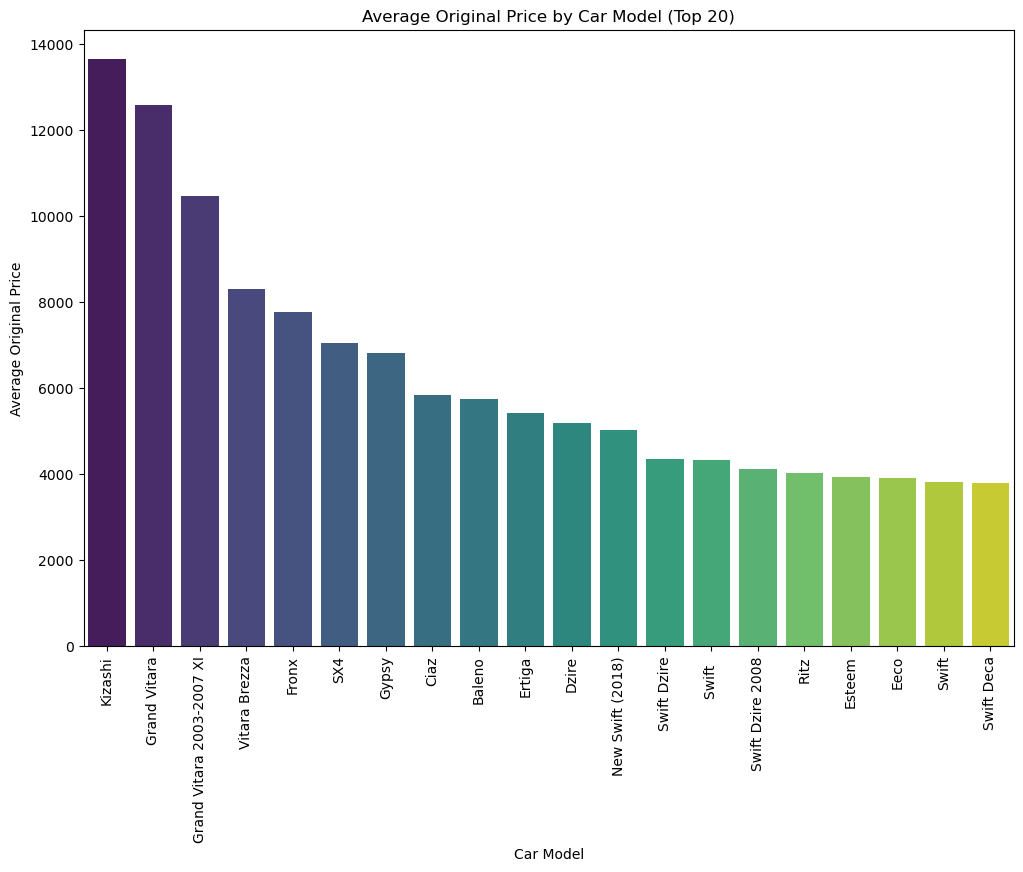

In [33]:
# Calculating average selling price per model
avg_price_by_model = df.groupby('Model')['Original Price'].mean().sort_values(ascending=False)

# Selecting top 20 models for visualization purpose
top_20_models = avg_price_by_model.head(20)

# Plotting bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=top_20_models.index, y=top_20_models.values, palette='viridis')
plt.title('Average Original Price by Car Model (Top 20)')
plt.xlabel('Car Model')
plt.ylabel('Average Original Price')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
  
plt.savefig('bar.png')
plt.show()  



Insights:

Top Luxury Models: With average original costs of $13,653.57 and $12,586.23, respectively, luxury models like "Kizashi" and "Grand Vitara" attract the highest prices, showing their premium status in the market.

SUV prices: Prices for SUV models vary greatly; for example, the average original price of a "Vitara Brezza" is $8,304.15, while the price of a "Grand Vitara 2003-2007 XI" is $10,471.50. This implies that different SUV models have different features, specs, or market positioning.

Popular Mid-range Models: The "Baleno" and "Ertiga" models, with average original prices of $5,734.40 and $5,421.96 respectively, are popular among customers looking for good value. They are classified as mid-range models.

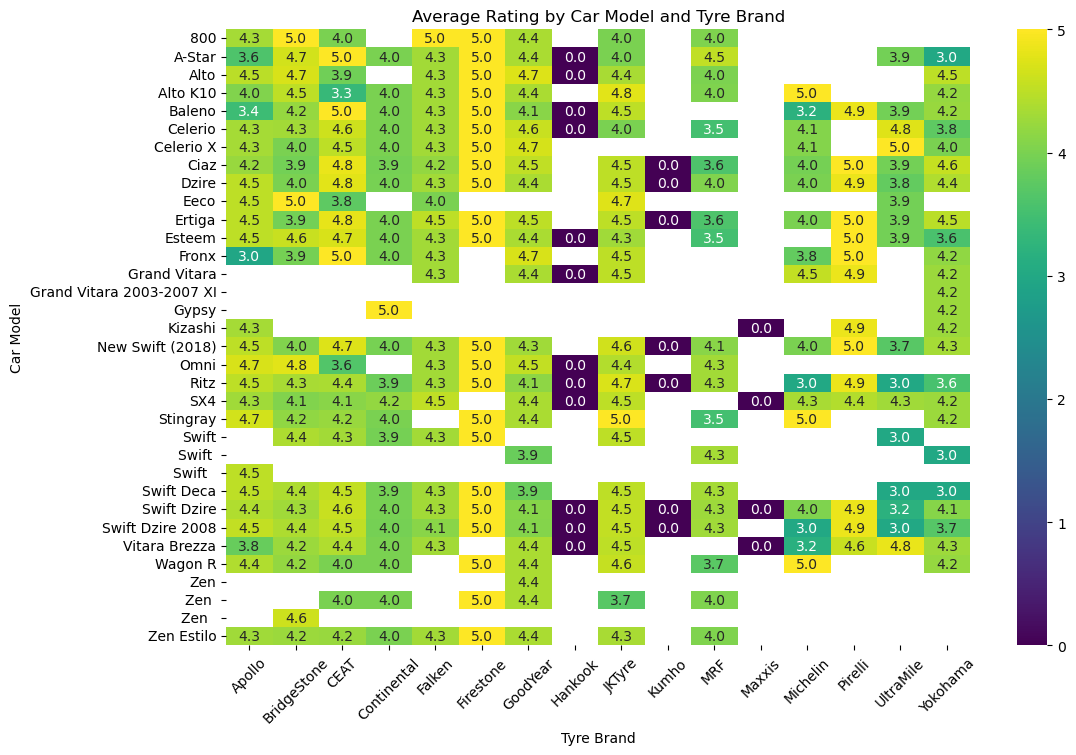

In [34]:
# Pivot the data to create a pivot table with Model as rows, Tyre Brand as columns, and Rating as values
pivot_table = pd.pivot_table(df, values='Rating', index='Model', columns='Tyre Brand', aggfunc='mean')

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='viridis', annot=True, fmt='.1f', cbar=True)
plt.title('Average Rating by Car Model and Tyre Brand')
plt.xlabel('Tyre Brand')
plt.ylabel('Car Model')
plt.xticks(rotation=45)  

plt.savefig('plot2.png')
plt.show()  




Insights:

Brand Superiority: A few tyre brands are rated higher than others on a variety of automobile types. For example, "Apollo" and "Firestone" have higher average ratings across a range of car models, suggesting that these brands may provide better customer satisfaction or performance than others.

Model-Specific Performance: Depending on the brand of tyres used, ratings for various automobile models vary. For example, "Baleno" and "Swift Dzire" have ratings that vary between different tyre brands, indicating that the tyre selection may have an impact on these models' performance.

Outliers: Some automobile models and tyre manufacturers have ratings that are noticeably higher or lower than others, making them stand out from the crowd. For instance, the "Swift Deca" with "Ultra Mile" tyres has a rating that is significantly lower than the overall grade (3.0), suggesting that there may be problems or discontent unique to this combination.

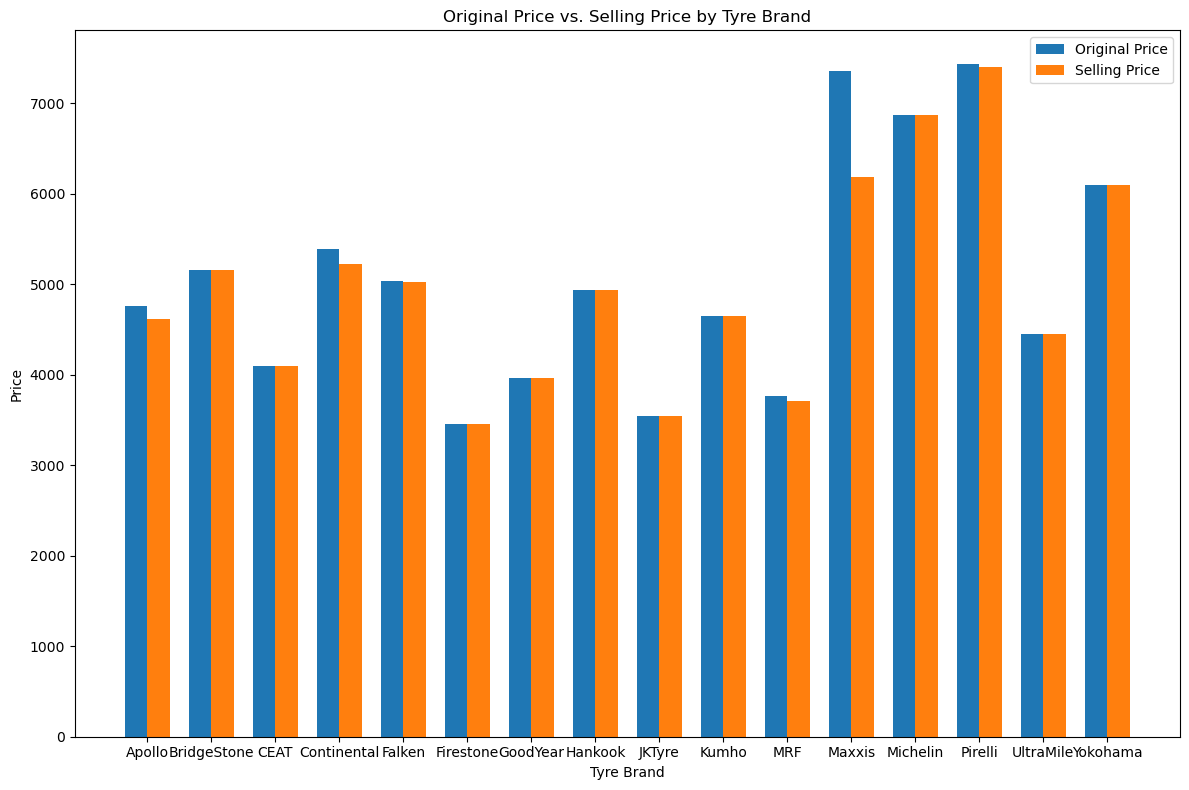

<Figure size 640x480 with 0 Axes>

In [27]:
# Grouping the data data by Tyre Brand and calculate average prices
price_means = df.groupby('Tyre Brand')[['Original Price', 'Selling Price']].mean().reset_index()

# Set up plot
plt.figure(figsize=(12, 8))

# Plotting side-by-side bars
bar_width = 0.35
index = price_means.index
labels = price_means['Tyre Brand']

# Plotting Original Price bars
plt.bar(index - bar_width/2, price_means['Original Price'], bar_width, label='Original Price')

# Plotting Selling Price bars
plt.bar(index + bar_width/2, price_means['Selling Price'], bar_width, label='Selling Price')

# Adding labels, title, and legend
plt.xlabel('Tyre Brand')
plt.ylabel('Price')
plt.title('Original Price vs. Selling Price by Tyre Brand')
plt.xticks(index, labels)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()
  
plt.savefig('plot3.png')

Insights:

Comparing Prices: For every tyre brand, the average Original Price and Selling Price are shown in the chart. It gives insights into pricing strategies used by different brands by graphically illustrating the disparity between the two prices.

Pricing Consistency: Brands with nearly equal average Original and Selling Prices, such as Bridgestone, CEAT, and GoodYear, suggest that their pricing policies are consistent. For instance, the average selling price and original price for Bridgestone are both at $5154.45.

Price Variability: For brands like Maxxis and Continental, there are noticeable differences between the average Original and Selling Prices, suggesting adjustments to market positioning or pricing tactics. For example, the average selling price of Continental is  5217.04, 
 5384.11 is around $167.07 .

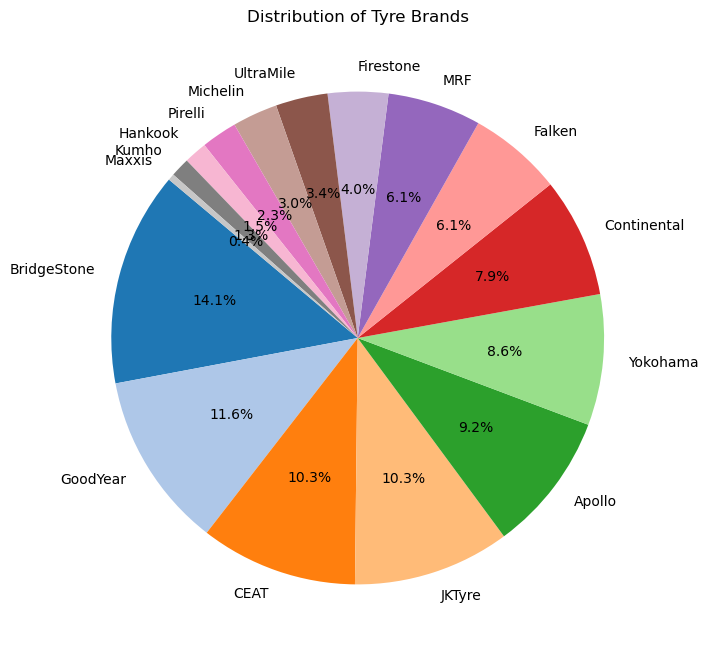

In [36]:
# Calculate value counts for Tyre Model
model_counts = df['Tyre Brand'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(model_counts, labels=model_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Distribution of Tyre Brands') 

plt.savefig('plot4.png')
plt.show()  



Insights:

The distribution of tyre brands within the dataset is shown as a pie chart, which provides information on the relative popularity of each brand.

Bridgestone: With a distribution of 14.1%, Bridgestone is the most well-known tyre brand in the collected data. It leads the pack. Given the dataset's context, its considerably larger representation indicates that it is either a widely used or well-liked option among customers.

Maxxis: On the other hand, Maxxis has the least distribution, making up only 0.4% of the total. This implies that, in comparison to other brands, Maxxis tyres are comparatively less common in the sample.

MRF and Falcon: At 6.1%, the distributions of MRF and Falcon are identical. This suggests that their market share in the dataset is equal, indicating a mild presence in contrast to Bridgestone.

# Linear Regression

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Converting columns to string data type 
df['Original Price'] = df['Original Price'].astype(str)
df['Selling Price'] = df['Selling Price'].astype(str)

# Removing non-numeric characters from 'Original Price' and 'Selling Price' columns
df['Original Price'] = df['Original Price'].str.replace('[^\d.]', '', regex=True).astype(float)
df['Selling Price'] = df['Selling Price'].str.replace('[^\d.]', '', regex=True).astype(float)

# Handling missing values
df.dropna(subset=['Original Price', 'Selling Price'], inplace=True)

# Defining the features (X) and target variable (y)
X = df[['Load Index', 'Original Price']]  # Independent variables
y = df['Selling Price']  # Dependent variable

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 19438.207763777253


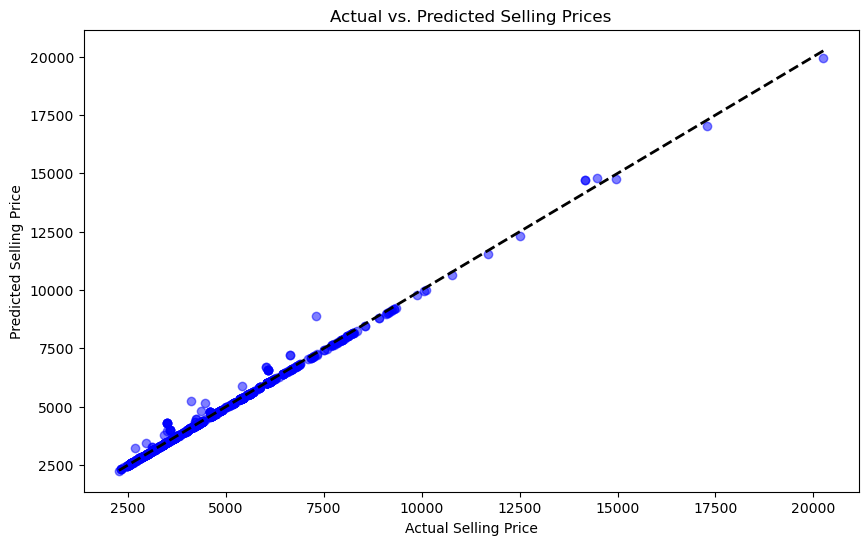

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs. Predicted Selling Prices')  

plt.savefig('plot5.png')
plt.show()  



Insights:    

The linear regression analysis conducted on tire data provides valuable insights into the relationship between various features and the selling prices of tires. Firstly, the model utilizes the 'Load Index' and 'Original Price' as predictors for estimating the selling price of tires. The resulting mean squared error (MSE) of approximately 19438.21 indicates a level of prediction error in the model's estimations. This suggests that while the selected features contribute to predicting selling prices to some extent, there are other factors not accounted for in the model that also influence tire pricing. Moreover, the MSE signifies the average squared difference between the actual and predicted selling prices, implying that the model's predictions deviate by around $19438.21 on average from the actual selling prices. Consequently, there is room for further refinement and inclusion of additional relevant variables to enhance the model's predictive accuracy and better inform the procurement process for the automotive manufacturer.